# Analyzing Gender and Federation Performance Disparities Among Chess Players: Insights from Visualizing Career Progress, Ranking Federations, and Examining Women Grandmasters Career Performance

## Abstract
The purpose of this study is to analyse data pertaining to masters (Ms) of chess, comparing genders, federations, and a pair of women grandmasters (WGMs). There are four main parts of this study: The first task is to display the top-rated grandmasters (GMs), both men and women, and their career progress vis-a-vis reaching higher ratings. To accomplish this, this study will use established python libraries to visualise the data, including visualizations of career data and regression, and will provide a list of functions used throughout the project. The second task is to rank federations in descending order of number of masters and to compare this with all players in those federations. Here, the focus will be on the top-20 federations. Another visualization will be provided to aid in the comparative analysis of masters versus all players in these federations. The third task will be to examine WGMs and consider who played the most games. The study will pick a couple pairs of WGM players who played more than 10 games and correlate their matches with their FIDE ratings over time. Finally, this study will comment on some surprising discoveries in this analysis -- that is, that sometimes higher ranked-players lose matches against lower ranked players. The overall findings of the project reveal interesting insights into the gender gap in chess performance, as well as the disparities between different federations. The project concludes with a discussion of the implications of these findings for the future of chess and the efforts to promote gender and cross-cultural equality and diversity in the sport.

## *Keywords: Chess, FIDE Rankings, Gender, Grandmasters, Linear Regression, Nationalism, Polynomial Regression, Statistics, Women Grandmasters*

## Introduction

Chess is a timeless game that has captivated minds and hearts for centuries. It is a game of strategy, skill, and patience that has been enjoyed by people of all ages and backgrounds around the world. With its complex rules, intricate tactics, and intense gameplay, chess has become a symbol of intellectual prowess and strategic thinking. Its accessibility makes it a fruitful source whence people from different groups can come together in a battle of wits. However, with its international popularity and accessibility arises the problem of comparison and feelings of superiority, and even racism and xenophobia. This study intends to highlight these problems vis-a-vis its data analysis.

After a brief methodological overview, this study begins in Part 1 by comparing men and women grandmasters (respectively, GM and WGMs), and observing differences and similaries in their career trends. It will compare the top players from these respective categories and consider regression lines of different types on their progress. Then, in Part 2, this study will look at trends in federations -- number of grandmasters in various countries versus how many players play in tournaments -- and will compare and contrast them using a box plot with summary statistics. Next, in Part 3, this study will examine online games, sort them according to WGMs and visualize who had the most games played against other WGMs. The second section of Part 3 will select from the datasets a pair of WGM players who played more than 10 games and correlate their matches with their FIDE ratings over time. This study will then conclude with a discussion section that examines the ethical and social political consequences of this study. Overall, this project advises caution when doing a comparative analysis of this type, because it *can* contribute to gender inequality and nationalism.

## Methods

As per recommended pythonic guidelines, this study will begin by importing all the modules and libraries that will be used to perform the tasks required. Indispensible tools will include pandas, for use of dataframe manipulation; matplotlib and seaborn, for data visualization; and string, to perform the basic functions of string manipulation. It will also import libraries like scipy (scientific python) for use of statistical calculations such as linear regression and numpy for its computational convenience. Because this study tracks data over time, datetime will be used to aid in the conversion of the years and months columns into a single column that includes all the date data. Note that there are often commented out sections of code; this is to facilitate checking whether the DataFrames turned out correctly, but are not necessary for the important visualizations.

In [1]:
# Import all modules and libraries:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import string
import time
import datetime
import numpy as np
from scipy import stats
from scipy.stats import linregress

%matplotlib inline

#os.getcwd()

Now, the project includes all the functions that will be employed throughout. Again, this is in adherence to recommended pythonic standards.

In [2]:
def get_youngest_grandmasters():
    """
    Select the youngest GM and WGM players from a dataframe of chess players and then return:
    youngest_gm (DataFrame): A DataFrame containing the username and name of the youngest Grandmaster.
    youngest_wgm (DataFrame): A DataFrame containing the username and name of the youngest Woman Grandmaster.
    """
    global players
    gm_and_wgm = players[players['title'].isin(['GM', 'WGM'])] # select both GMs and WGMs
    gm_and_wgm = gm_and_wgm.sort_values('yob', ascending=False) # sort by year of birth
    youngest_gm = gm_and_wgm.loc[gm_and_wgm['title'] == 'GM', ['username', 'name']].iloc[0] # select youngest GM
    youngest_wgm = gm_and_wgm.loc[gm_and_wgm['title'] == 'WGM', ['username', 'name']].iloc[0] # select youngest WGM
    return youngest_gm, youngest_wgm

def get_ratings_from_year(fide_id, year):
    """
    Given a player's FIDE ID and a year, return his or her rating information for that year from the 
    corresponding CSV file.
    """
    filename = f'ratings_{year}.csv'
    ratings_file = pd.read_csv(filename)
    player_rating = ratings_file[ratings_file['fide_id'] == fide_id]
    return player_rating

def get_player_ratings_for_all_years(fide_id):
    """
    Given a player's FIDE ID, return their rating information for all years from 2015 to 2021.
    """    
    all_years = [get_ratings_from_year(fide_id, year) for year in range(2015, 2022)]
    all_ratings_over_years = pd.concat(all_years)
    all_ratings_over_years['year and month'] = all_ratings_over_years['year'].astype(str) + '/' + all_ratings_over_years['month'].astype(str)
    all_ratings_over_years = all_ratings_over_years.drop(['year', 'month'], axis=1)
    return all_ratings_over_years

def track_ratings(player_1, player_2, player_1_name, player_2_name, rating_type):
    """
    Plot the rating evolution over time for two players in a given rating type.
    """

    assert rating_type in ('standard', 'rapid', 'blitz'), 'the rating type must be either standard, rapid, or blitz'

    x_axis = pd.to_datetime(player_1['year and month']).dt.year.astype(str).to_numpy()
    player_1_rating = player_1[f'rating_{rating_type}'].to_numpy()
    player_2_rating = player_2[f'rating_{rating_type}'].to_numpy()

    sns.set_style('whitegrid')
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_title(f'{player_1_name} vs. {player_2_name} ({rating_type.title()})', fontsize=16)
    sns.lineplot(x=x_axis, y=player_1_rating, label=player_1_name, linewidth=2, color='blue', ax=ax)
    sns.lineplot(x=x_axis, y=player_2_rating, label=player_2_name, linewidth=2, color='red', ax=ax)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Rating', fontsize=12)
    ax.legend(loc='upper left', fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

def get_federations(k):
    """
    This function returns the top k federations that have produced the most titled chess players. 
    It takes an integer k as input, which specifies the number of federations to be returned. 
    The function first selects all titled players with a title containing the letter 'M', and then counts 
    the number of players from each federation. It returns a pandas Series object with the k federations that 
    have the highest number of titled players, sorted in descending order. If k is not a positive integer, 
    the function raises an assertion error.
    """
    assert isinstance(k, int) and k > 0, 'k must be a positive integer'
    global players
    masters = players[players['title'].str.contains('M')]
    masters_count = masters['federation'].value_counts().head(k)
    return masters_count

def get_ratings_from_federation(federation):
    """
    Returns the latest FIDE ratings for players in a given federation.
    """
    global players
    players_in_federation = players[players['federation'] == federation]
    ratings_file = pd.read_csv('ratings_2021.csv')
    latest_month = ratings_file['month'].max()
    ratings_from_latest_month = ratings_file[ratings_file['month'] == latest_month]
    fide_id_from_federation = players_in_federation['fide_id'].unique()
    ratings_from_federation = ratings_from_latest_month[ratings_from_latest_month['fide_id'].isin(fide_id_from_federation)]
    return ratings_from_federation


def get_wgm_games():
    """
    Returns all chess games played between two WGMs since 2016.
    """
    wgm = pd.read_csv('games_wgm.csv')
    wgm['end_time'] = pd.to_datetime(wgm['end_time'])
    wgm_usernames = wgm['wgm_username'].unique()
    wgm_games = wgm[(wgm['end_time'] >= '2016-01-01') & (wgm['white_username'].isin(wgm_usernames)) & (wgm['black_username'].isin(wgm_usernames))]
    return wgm_games


def combine_pairs(pairing_counts):
    """
    Combines pairs of players into a single DataFrame, with the number of games played between them as a column.
    """
    combined_dataframe = pd.DataFrame(columns=['player_1', 'player_2', 'number_of_games'])
    read_pairs = []
    for players, games in pairing_counts.iteritems():
        if players not in read_pairs:
            player_1, player_2 = players
            number_of_games = games
            reverse = tuple(reversed(players))
            if reverse in pairing_counts.index:
                read_pairs.append(reverse)
                number_of_games += pairing_counts[reverse]
            combined_pair = pd.DataFrame({'player_1': player_1, 'player_2': player_2, 'number_of_games': number_of_games}, index=[0])
            combined_dataframe = pd.concat([combined_pair, combined_dataframe]).reset_index(drop=True)
    combined_dataframe = combined_dataframe.sort_values('number_of_games', ascending=False).reset_index(drop=True)
    return combined_dataframe
            
def track_top_10(top_ten_most_played):
    """
    Prints the top 10 pairs of players who have played the most games together and tracks their ratings over time.
    """
    mappings = pd.read_csv('mappings.csv')
    for index, row in top_ten_most_played.iterrows():
        player_1, player_2, games_played = row['player_1'], row['player_2'], row['number_of_games']
        print(f"The players, {player_1} and {player_2} have played {games_played} games against each other.")
        if player_1 in mappings['username'].unique() and player_2 in mappings['username'].unique():
            player_1_fid = mappings.loc[mappings['username'] == player_1, 'fid'].iloc[0]
            player_1_name = mappings.loc[mappings['username'] == player_1, 'name'].iloc[0]
            player_2_fid = mappings.loc[mappings['username'] == player_2, 'fid'].iloc[0]
            player_2_name = mappings.loc[mappings['username'] == player_2, 'name'].iloc[0]
            player_1_ratings = get_player_ratings_for_all_years(player_1_fid)
            player_2_ratings = get_player_ratings_for_all_years(player_2_fid)
            track_ratings(player_1_ratings, player_2_ratings, player_1_name, player_2_name, 'standard')
            track_ratings(player_1_ratings, player_2_ratings, player_1_name, player_2_name, 'rapid')
            track_ratings(player_1_ratings, player_2_ratings, player_1_name, player_2_name, 'blitz')
        else:
            print(f"Evidently, {player_1} or {player_2} is not in the mappings.")


In [3]:
# Define dataframe, using pandas to open data file:

df = pd.read_csv("players.csv")

In [4]:
# Drop the incomplete data, using the dropna method:

df = df.dropna()

### Part 1: Who is the youngest WGM? And who is the youngest GM?

#### The youngest WGM:

In [5]:
# Create new dataframe for females, with columns displaying year of birth (yob) and gender female.

females = df[(df.yob != 0) & (df.gender == "F")]

In [6]:
# Create new dataframe for female grandmasters, by defining column from female dataframe set to 'WGM'.

females_gm = females[females.title == 'WGM']

In [7]:
# Use sort_values method according to year of birth, with decending order.

females_gm = females_gm.sort_values(by = 'yob', ascending=False)
females_gm.head()

,fide_id,name,federation,gender,title,yob
364425,34127035,"Garifullina, Leya",RUS,F,WGM,2004
306909,24174041,"Maltsevskaya, Aleksandra",RUS,F,WGM,2002
109624,2620472,"Ouellet, Maili-Jade",CAN,F,WGM,2002
196489,8608059,"Zhu, Jiner",CHN,F,WGM,2002
305632,24153648,"Obolentseva, Alexandra",RUS,F,WGM,2001


We can see that the youngest WGM, from the above dataframe, is the Russian player, Leya Garifullina.

#### The youngest GM

The following simply repeats the steps from above, but for the male grandmasters.

In [8]:
# Create dataframe using males.

males = df[(df.yob != 0) & (df.gender == "M")]

In [9]:
# Create dataframe for male grandmasters.

males_gm = males[males.title == 'GM']

In [10]:
# Sort the values for males according to year of birth, and in descending order.

males_gm = males_gm.sort_values(by='yob', ascending=False)
males_gm.head()

,fide_id,name,federation,gender,title,yob
413917,46616543,Gukesh D,IND,M,GM,2006
250653,14205483,"Sindarov, Javokhir",UZB,M,GM,2005
327317,25059530,Praggnanandhaa R,IND,M,GM,2005
388421,35093487,"Sadhwani, Raunak",IND,M,GM,2005
226683,12940690,"Keymer, Vincent",GER,M,GM,2004


We can see that the youngest male grandmaster is D Gukesh, from India.

This study will now consider how the chess ratings have developed for the two youngest grandmasters of male and female sex -- namely, D Gukesh and Leya Garifullina -- over the period from 2015 to 2021. 

In [11]:
# Load the FIDE ratings datasets into a pandas DataFrame
ratings = pd.concat([pd.read_csv(f'ratings_{year}.csv') for year in range(2015, 2022)], axis=0).dropna()

In [12]:
# Create new subdataframes for the two players to be compared:

gukesh_d = ratings[ratings.fide_id == 46616543]

garifullina_l = ratings[ratings.fide_id == 34127035]

In [13]:
# Create date column

gukesh_d.loc[:, 'date'] = pd.to_datetime(gukesh_d['year'].astype(str) + '-' + gukesh_d['month'].astype(str), format='%Y-%m')
gukesh_d = gukesh_d.sort_values('date')

/var/folders/vx/dlcd77z53lng08llsztvjffc0000gn/T/ipykernel_79409/2642730012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gukesh_d.loc[:, 'date'] = pd.to_datetime(gukesh_d['year'].astype(str) + '-' + gukesh_d['month'].astype(str), format='%Y-%m')


In [14]:
# These lines of code are processing the date information in the gukesh_d and garifullina_l dataframes. 
# Specifically, the code is creating a new column named "date" that combines the "year" and "month" columns, 
# converted to strings, and formatted as "YYYY-MM" using the pd.to_datetime() method.

# Then, the dataframes are sorted in ascending order based on the new "date" column using the sort_values() method. 
# The resulting dataframes can then be used for further analysis and visualization.

gukesh_d.loc[:, 'date'] = pd.to_datetime(gukesh_d['year'].astype(str) + '-' + gukesh_d['month'].astype(str), format='%Y-%m')
gukesh_d = gukesh_d.sort_values('date')

garifullina_l.loc[:, 'date'] = pd.to_datetime(garifullina_l['year'].astype(str) + '-' + garifullina_l['month'].astype(str), format='%Y-%m')
garifullina_l = garifullina_l.sort_values('date')

/var/folders/vx/dlcd77z53lng08llsztvjffc0000gn/T/ipykernel_79409/1748908388.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  garifullina_l.loc[:, 'date'] = pd.to_datetime(garifullina_l['year'].astype(str) + '-' + garifullina_l['month'].astype(str), format='%Y-%m')


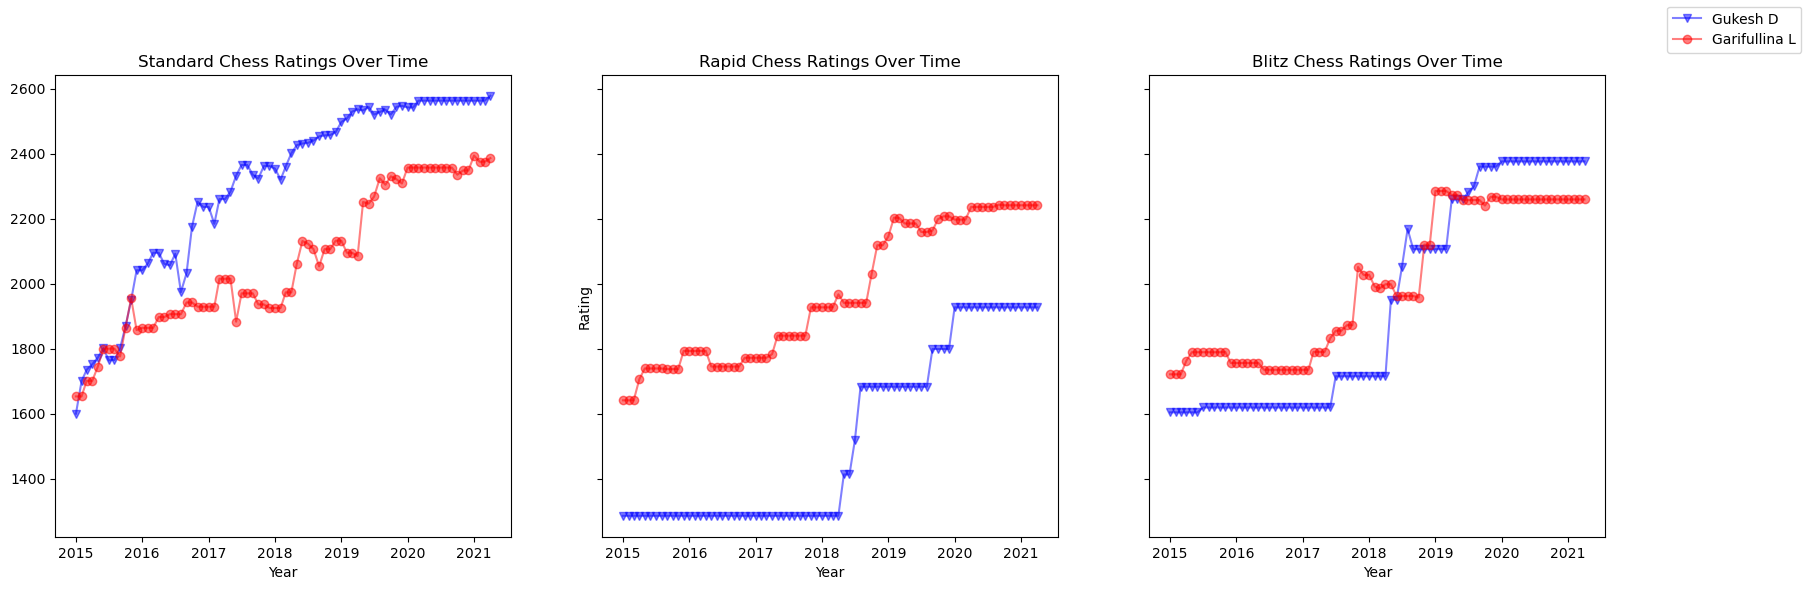

In [15]:
# Define a list of dictionaries that contain the label and the column name for each type of chess rating. 
# Then, use a for loop to iterate over this list and create the subplots, using the values from each dictionary 
# to set the label, column, and title. The if statement is used to set the y-label only for the second subplot. 
# Finally, we add the legend as before.

fig, axs = plt.subplots(1, 3, figsize=(20,6), sharey=True)

data = [
    {'label': 'Standard', 'column': 'rating_standard'},
    {'label': 'Rapid', 'column': 'rating_rapid'},
    {'label': 'Blitz', 'column': 'rating_blitz'}
]

for i, d in enumerate(data):
    axs[i].plot(gukesh_d['date'], gukesh_d[d['column']], label='Gukesh D', alpha=0.5, linestyle='-', color='b', marker='v')
    axs[i].plot(garifullina_l['date'], garifullina_l[d['column']], label='Garifullina L', alpha=0.5, linestyle='-', color='r', marker='o')
    axs[i].set_xlabel('Year')
    axs[i].set_title(f'{d["label"]} Chess Ratings Over Time')
    if i == 1:
        axs[i].set_ylabel('Rating')

# Add legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.show()

This is how Gukesh's ratings and Garifullina's ratings have developed over time in the three categories of chess. Several observations can be made from these graphs: Both Gukesh D and Garifullina L have shown improvement in their chess ratings over time in all three categories -- standard, rapid, and blitz. In the standard chess ratings graph, Garifullina L and Gukesh D shared a strikingly similar developmental trajectory until around late 2015, after which Gukesh D surpassed her in rating. Interestingly, Gukesh appeared not to be as interested in the "rapid" style of chess until early 2018; likewise, there was not significant increases in his ratings for blitz chess until mid-2017 to early 2018, at which time his rating increased rapidly. This may be because he first developed skills in standard chess games and then decided to move into the rapid and blitz arenas afterward. Additionally, Garifullina ostensibly focuses more on rapid style of play, as her rapid rating has been above Gukesh's at any given time. Interestingly, there has been a lull in variation and improvement for both players during 2020 onward. This is likely due to Covid. 

To gain further insight, this study now will consider regression lines fit to the above data. This will reveal important information about the rates of rating increase for both players. 

The equation for linear regression can be expressed as:

\begin{equation}
y = \beta_0 + \beta_1x_1 + \epsilon
\end{equation}

where $y$ is the response variable, $x_1$ is the predictor variable, $\beta_0$ is the y-intercept, $\beta_1$ is the slope, and $\epsilon$ is the error term.

The equation for polynomial regression of degree 6 can be expressed as:

\begin{equation}
y = \beta_0 + \beta_1x_1 + \beta_2x_1^2 + \beta_3x_1^3 + \beta_4x_1^4 + \beta_5x_1^5 + \beta_6x_1^6 + \epsilon
\end{equation}

where $y$ is the response variable, $x_1$ is the predictor variable, $\beta_0$ is the y-intercept, $\beta_1$ to $\beta_6$ are the coefficients of the polynomial terms, and $\epsilon$ is the error term.

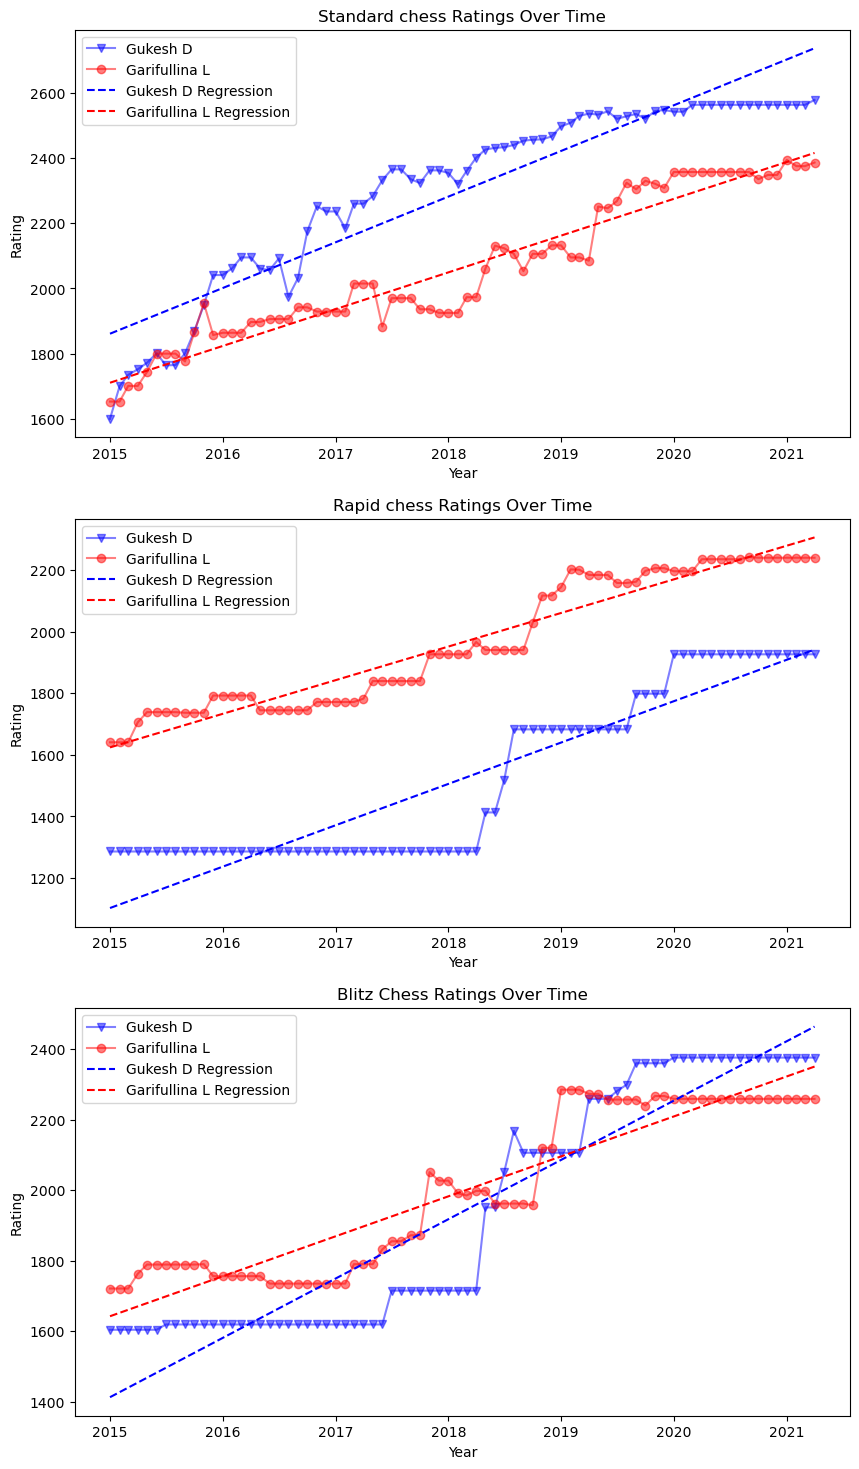

In [16]:
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Plot 1
axes[0].plot(gukesh_d['date'], gukesh_d['rating_standard'], label='Gukesh D', alpha=0.5, linestyle='-', color='b', marker='v')
axes[0].plot(garifullina_l['date'], garifullina_l['rating_standard'], label='Garifullina L', alpha=0.5, linestyle='-', color='r', marker='o')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Rating')
axes[0].set_title('Standard chess Ratings Over Time')
gukesh_coeffs = np.polyfit(gukesh_d['date'].astype(int), gukesh_d['rating_standard'], 1)
gukesh_reg_line = np.poly1d(gukesh_coeffs)(gukesh_d['date'].astype(int))
garifullina_coeffs = np.polyfit(garifullina_l['date'].astype(int), garifullina_l['rating_standard'], 1)
garifullina_reg_line = np.poly1d(garifullina_coeffs)(garifullina_l['date'].astype(int))
axes[0].plot(gukesh_d['date'], gukesh_reg_line, color='b', label='Gukesh D Regression', linestyle='--')
axes[0].plot(garifullina_l['date'], garifullina_reg_line, color='r', label='Garifullina L Regression', linestyle='--')
axes[0].legend()

# Plot 2
axes[1].plot(gukesh_d['date'], gukesh_d['rating_rapid'], label='Gukesh D', alpha=0.5, linestyle='-', color='b', marker='v')
axes[1].plot(garifullina_l['date'], garifullina_l['rating_rapid'], label='Garifullina L', alpha=0.5, linestyle='-', color='r', marker='o')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Rating')
axes[1].set_title('Rapid chess Ratings Over Time')
gukesh_coeffs = np.polyfit(gukesh_d['date'].astype(int), gukesh_d['rating_rapid'], 1)
gukesh_reg_line = np.poly1d(gukesh_coeffs)(gukesh_d['date'].astype(int))
garifullina_coeffs = np.polyfit(garifullina_l['date'].astype(int), garifullina_l['rating_rapid'], 1)
garifullina_reg_line = np.poly1d(garifullina_coeffs)(garifullina_l['date'].astype(int))
axes[1].plot(gukesh_d['date'], gukesh_reg_line, color='b', label='Gukesh D Regression', linestyle='--')
axes[1].plot(garifullina_l['date'], garifullina_reg_line, color='r', label='Garifullina L Regression', linestyle='--')
axes[1].legend()


# Plot 3
axes[2].plot(gukesh_d['date'], gukesh_d['rating_blitz'], label='Gukesh D', alpha=0.5, linestyle='-', color='b', marker='v')
axes[2].plot(garifullina_l['date'], garifullina_l['rating_blitz'], label='Garifullina L', alpha=0.5, linestyle='-', color='r', marker='o')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Rating')
axes[2].set_title('Blitz Chess Ratings Over Time')
gukesh_coeffs = np.polyfit(gukesh_d['date'].astype(int), gukesh_d['rating_blitz'], 1)
gukesh_reg_line = np.poly1d(gukesh_coeffs)(gukesh_d['date'].astype(int))
axes[2].plot(gukesh_d['date'], gukesh_reg_line, color='b', label='Gukesh D Regression', linestyle='--')
garifullina_coeffs = np.polyfit(garifullina_l['date'].astype(int), garifullina_l['rating_blitz'], 1)
garifullina_reg_line = np.poly1d(garifullina_coeffs)(garifullina_l['date'].astype(int))
axes[2].plot(garifullina_l['date'], garifullina_reg_line, color='r', label='Garifullina L Regression', linestyle='--')

axes[2].legend()
plt.show()

The regression lines show a clear upward trend in all three categories for both players, indicating steady improvement in their ratings over time. The standard chess ratings graph has the widest range of ratings, indicating that this format may be more competitive and challenging than rapid or blitz chess.

Because Gukesh seemed not to focus as much on the time period before 2018, it is interesting to consider a linear regression line after he started playing that style more.

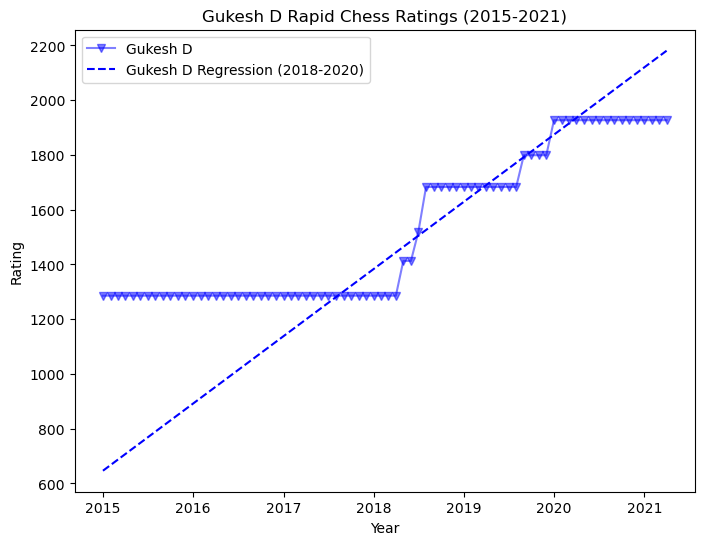

In [17]:
# Filter gukesh_d to include only data from 2015 to 2021
gukesh_filtered = gukesh_d[(gukesh_d['date'] >= '2015-01-01') & (gukesh_d['date'] <= '2021-12-31')]

# Filter gukesh_d to include only data from 2018 to early 2020 for the regression line
gukesh_filtered_2018_2020 = gukesh_d[(gukesh_d['date'] >= '2018-03-01') & (gukesh_d['date'] <= '2020-01-01')]

# Create a new figure and axis for the Gukesh regression line
fig_gukesh, ax_gukesh = plt.subplots(figsize=(8, 6))

# Plot the filtered Gukesh data and the regression line
ax_gukesh.plot(gukesh_filtered['date'], gukesh_filtered['rating_rapid'], label='Gukesh D', alpha=0.5, linestyle='-', color='b', marker='v')
gukesh_coeffs = np.polyfit(gukesh_filtered_2018_2020['date'].astype(int), gukesh_filtered_2018_2020['rating_rapid'], 1)
gukesh_reg_line = np.poly1d(gukesh_coeffs)(gukesh_filtered['date'].astype(int))
ax_gukesh.plot(gukesh_filtered['date'], gukesh_reg_line, color='b', label='Gukesh D Regression (2018-2020)', linestyle='--')
ax_gukesh.set_xlabel('Year')
ax_gukesh.set_ylabel('Rating')
ax_gukesh.set_title('Gukesh D Rapid Chess Ratings (2015-2021)')
ax_gukesh.legend()

plt.show()

We see a steeper rate of rating increase. The reason is speculative, but it might have to do with one's skill increasing overall due to attention on the other two types of play, and then deciding suddenly to try this style.

In [18]:
gukesh_slope = gukesh_coeffs[0]
garifullina_slope = garifullina_coeffs[0]
print(f'On average, the increase in standard rating over all years considered for Gukesh is {gukesh_slope}')
print(f'For Garifullina it is {garifullina_slope}.')

On average, the increase in standard rating over all years considered for Gukesh is 7.782395632473141e-15
For Garifullina it is 3.5915892775147574e-15.


It appears that these particular players' performance over the years both have increased on average at different rates. It may be interesting to observe a polynomial regression line for the standard chess rating.

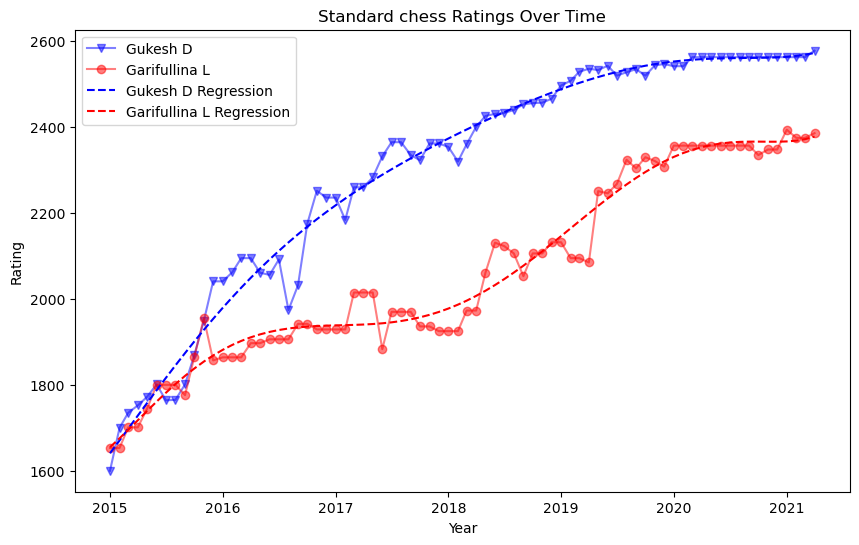

In [19]:
# Run polynomial of degree 6 regression:
garifullina_l['date'] = pd.to_datetime(garifullina_l['year'].astype(str) + '-' + garifullina_l['month'].astype(str), format='%Y-%m')
garifullina_l = garifullina_l.sort_values('date')

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(gukesh_d['date'], gukesh_d['rating_standard'], label='Gukesh D', alpha=0.5, linestyle='-', color='b', marker='v')
ax.plot(garifullina_l['date'], garifullina_l['rating_standard'], label='Garifullina L', alpha=0.5, linestyle='-', color='r', marker='o')
plt.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Rating')
ax.set_title('Standard chess Ratings Over Time')

# Calculate and plot the regression lines
gukesh_coeffs = np.polyfit(gukesh_d['date'].astype(int), gukesh_d['rating_standard'], 6)
gukesh_reg_line = np.poly1d(gukesh_coeffs)(gukesh_d['date'].astype(int))
ax.plot(gukesh_d['date'], gukesh_reg_line, color='b', label='Gukesh D Regression', linestyle='--')

garifullina_coeffs = np.polyfit(garifullina_l['date'].astype(int), garifullina_l['rating_standard'], 6)
garifullina_reg_line = np.poly1d(garifullina_coeffs)(garifullina_l['date'].astype(int))
ax.plot(garifullina_l['date'], garifullina_reg_line, color='r', label='Garifullina L Regression', linestyle='--')

plt.legend()
plt.show()

Using this polynomial fit, where the degree of polynomial is related within recommended guidelines given the dataset, Gukesh seems to be improving at a declining rate, whereas Garifullina seems to vary in her improvement, going through periods of growth and slowing down. 

### Part 2: Ranking federations:
#### Part 2.a: Ranking federations by number of masters.
Here, the study considers players who have the title "master." Master titles are: Grand Master (GM), Woman Grand Master (WGM), International Master (IM), Woman International Master (WIM), FIDE Master (FM), Woman FIDE Master (WFM), Candidate Master (CM) and Woman Candidate Master (WCM).

In [20]:
# Load dataset, dropping NA names

players = pd.read_csv('players.csv')
players = players.dropna()
players.head()

,fide_id,name,federation,gender,title,yob
0,100013,"Campora, Daniel H.",ARG,M,GM,1957
1,100021,"Quinteros, Miguel A.",ARG,M,GM,1947
4,100072,"Adla, Diego",ARG,M,IM,1968
5,100080,"Bianchi, Guillermo",ARG,M,IM,1958
6,100102,"Cid, Marino Alejandro",ARG,M,IM,1958


In [21]:
# The study is considering masters according to the assessment brief:

master_titles = ['GM', 'WGM', 'IM', 'WIM', 'FM', 'WFM', 'CM', 'WCM']
masters = players[players['title'].isin(master_titles)]

In [22]:
masters['rank'] = masters.groupby('federation')['title'].rank(ascending=False)
p = masters.sort_values(by = 'rank', ascending = False)

/var/folders/vx/dlcd77z53lng08llsztvjffc0000gn/T/ipykernel_79409/3925927607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  masters['rank'] = masters.groupby('federation')['title'].rank(ascending=False)


In [23]:
p = p.drop_duplicates(subset = 'federation')

In [24]:
masters['freq'] = masters.groupby('federation')['federation'].transform('count')
masters.drop_duplicates(subset='federation')
masters = masters.sort_values(by='freq', ascending = False)

/var/folders/vx/dlcd77z53lng08llsztvjffc0000gn/T/ipykernel_79409/3826604065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  masters['freq'] = masters.groupby('federation')['federation'].transform('count')


In [25]:
masters = masters.drop_duplicates(subset='federation')
masters = masters[['federation', 'freq']].head(20)

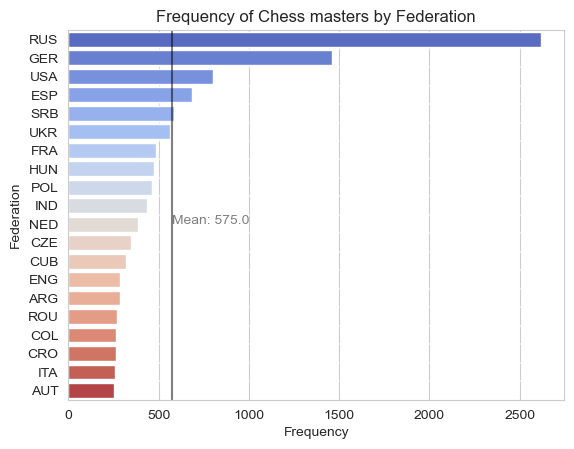

In [26]:
# This code sets the style of the plot to whitegrid, adds a title and labels to the axes, rotates the y-axis labels 
# to be horizontal, adds vertical lines to separate each federation, and adds a horizontal line and text box to show 
# the mean frequency.

# Set the style to a whitegrid
sns.set_style('whitegrid')

# Create the bar plot
ax = sns.barplot(x='freq', y='federation', data=masters, palette='coolwarm')

# Set the title and axes labels
ax.set_title('Frequency of Chess masters by Federation')
ax.set_xlabel('Frequency')
ax.set_ylabel('Federation')

# Rotate the y-axis labels to be horizontal
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Add vertical lines to separate each federation
for i in range(len(masters['federation'].unique())-1):
    plt.axhline((i+1)-0.5, color='white', alpha=0.5)
    
# Add a horizontal line to show the mean frequency
plt.axvline(masters['freq'].mean(), color='black', alpha=0.5)

# Add a text box to show the mean frequency
plt.text(masters['freq'].mean()+1, 10, 'Mean: {:.1f}'.format(masters['freq'].mean()), color='black', alpha=0.5)

# Show the plot
plt.show()

This visualization demonstrates *that* Russia has the highest number of masters within this dataset, followed by Germany, and the USA. There could be a number of reasons for this. Perhaps chess is more valued within Russian culture, and so more people pay attention to the game there. Or perhaps they have some natural predisposition toward being advanced at the game. To answer these "why" questions, further investigations beyond the scope of this study would be necessary. 

#### Part 2.b: Summarizing *all* player ratings in top-20 federations (as found in 2.a):

In [27]:
# Load the ratings dataset
ratings2021 = pd.read_csv('ratings_2021.csv')
ratings2021 = ratings2021.dropna()

In [28]:
# Filter the ratings dataset to only include the relevant years and columns
ratings2021 = ratings2021[['fide_id', 'year', 'rating_standard']]

In [29]:
# Merge the ratings dataset with the masters dataset on the fide_id column
player_ratings = pd.merge(players, ratings2021, on='fide_id')

To compare and contrast 2.a and 2.b, the project reproduces the Frequency of Chess masters plot next to a created box plot that shows the distribution of standard chess ratings for players within each of the top 20 federations ranked by the number of chess masters. The central box represents the interquartile range (IQR), which spans from the first quartile (Q1) to the third quartile (Q3), with a line representing the median rating. The whiskers represent the lowest and highest data points within 1.5 times the IQR, and any points outside of the whiskers are considered outliers. The box plot allows us to compare the variation and central tendency of ratings among the top federations.

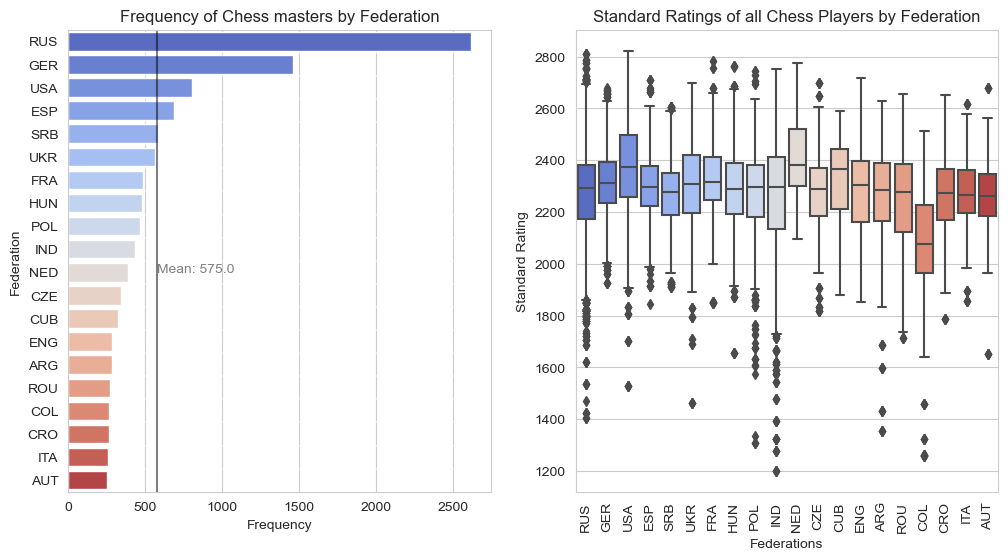

In [30]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

# Create the bar plot in the first subplot
sns.set_style('whitegrid')
sns.barplot(x='freq', y='federation', data=masters, palette='coolwarm', ax=ax1)
ax1.set_title('Frequency of Chess masters by Federation')
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Federation')
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)
for i in range(len(masters['federation'].unique())-1):
    ax1.axhline((i+1)-0.5, color='white', alpha=0.5)
ax1.axvline(masters['freq'].mean(), color='black', alpha=0.5)
ax1.text(masters['freq'].mean()+1, 10, 'Mean: {:.1f}'.format(masters['freq'].mean()), color='black', alpha=0.5)

# Create the box plot in the second subplot
ratings2021 = ratings2021[['fide_id', 'year', 'rating_standard']]
player_ratings = pd.merge(players, ratings2021, on='fide_id')
federations = masters['federation'].head(20).values
sns.boxplot(x='federation', y='rating_standard', data=player_ratings, palette='coolwarm', order=federations, ax=ax2)
ax2.set_title('Standard Ratings of all Chess Players by Federation')
ax2.set_xlabel('Federations')
ax2.set_ylabel('Standard Rating')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

# Show the plots
plt.show()

It appears that there is not much of a correlation between number of masters in a federation and the distribution of all players in those federations. This is clear upon visual inspection: Some countries have many outliers while others do not. The size of the standard deviation and variance stays relatively close, but there are still some differences between federations.

### Part 3: Playing chess online
#### Part 3.a: Which woman grandmaster played the most games with another woman grandmaster?

In [31]:
# Call the function get_federations from top-20 federations:

federations = get_federations(20)

In [32]:
# Plot a table that shows all the summary statistics using describe method within the federation array.

for fed in federations.index:
    print(f"\nThis data is from the federation {fed}")
    ratings_from_federation = get_ratings_from_federation(fed)
    print(ratings_from_federation[['rating_standard', 'rating_blitz', 'rating_rapid']].describe())

wgm = get_wgm_games()

print('Here is a sorted list of WGMs who played against other WGMs:')


This data is from the federation RUS
       rating_standard  rating_blitz  rating_rapid
count      2616.000000   1667.000000   1745.000000
mean       2272.464067   2211.163767   2222.995415
std         158.824528    202.870352    199.260715
min        1404.000000   1281.000000   1259.000000
25%        2175.000000   2087.000000   2104.000000
50%        2291.000000   2223.000000   2237.000000
75%        2370.000000   2340.000000   2349.000000
max        2812.000000   2801.000000   2784.000000

This data is from the federation GER
       rating_standard  rating_blitz  rating_rapid
count      1459.000000    626.000000    461.000000
mean       2276.374914   2278.853035   2289.396963
std         120.919556    139.098414    143.903881
min        1622.000000   1588.000000   1347.000000
25%        2214.000000   2200.000000   2212.000000
50%        2281.000000   2271.500000   2295.000000
75%        2342.000000   2357.000000   2381.000000
max        2670.000000   2690.000000   2651.000000

This 

       rating_standard  rating_blitz  rating_rapid
count       262.000000    201.000000    179.000000
mean       2266.202290   2260.004975   2265.692737
std         139.998936    151.415141    153.570320
min        1786.000000   1857.000000   1715.000000
25%        2179.000000   2163.000000   2182.000000
50%        2263.000000   2253.000000   2261.000000
75%        2356.750000   2350.000000   2356.500000
max        2645.000000   2638.000000   2650.000000

This data is from the federation ITA
       rating_standard  rating_blitz  rating_rapid
count       258.000000    163.000000    182.000000
mean       2264.406977   2233.012270   2241.109890
std         129.125347    162.325157    162.154142
min        1846.000000   1728.000000   1818.000000
25%        2189.500000   2133.000000   2152.250000
50%        2267.500000   2254.000000   2231.000000
75%        2347.750000   2330.500000   2348.500000
max        2617.000000   2641.000000   2722.000000

This data is from the federation AUT
      

In [33]:
# Show a table with the values played: 

white_counts = wgm.white_username.value_counts()
black_counts = wgm.black_username.value_counts()
total_counts = white_counts.add(black_counts,fill_value =0).astype(int).sort_values(ascending = False)
print(total_counts)

cukus              76
kungmongmanh       64
meoluoi91          38
martinique24       22
yennefer1          20
ahachess           18
ntmh281            18
ninullia           16
martabartel        14
ticobello          14
axvesik            14
meenakshiwgm       12
dey2580            10
vaishali2001        8
zabivol_mc          8
enkhtuul            8
medalja             6
checkitas           6
xuyuanyuan          6
elena1668           6
lisychess           6
xiaopang123         4
majoa88             4
mirandamikadze      4
kopeisk81           4
ktsatsalashvili     4
onlytime4           4
jinbojinbo          2
mirochka            2
pandazero           2
phoenix_sjh         2
cruziana            2
vwnv7               2
koenigin94          2
dtype: int64


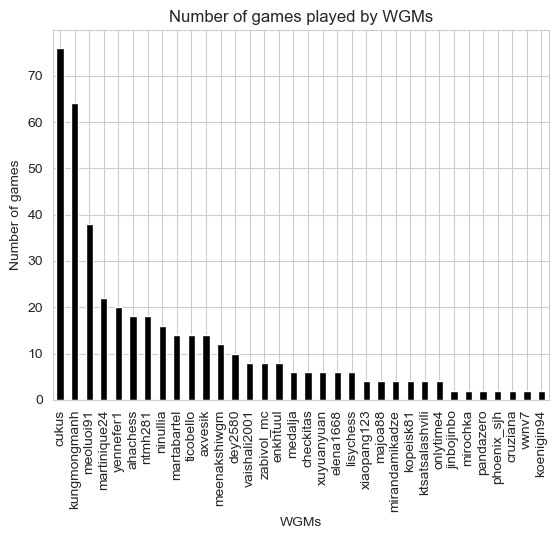

In [34]:
# Plot the results with a bar graph: 

total_counts.plot(kind='bar', color='k')
plt.title('Number of games played by WGMs')
plt.xlabel('WGMs')
plt.ylabel('Number of games')
plt.show()

The players, cukus and kungmongmanh appear to have played the most games.

#### Part 3.b: Examining a pair of women grandmasters who played more than 10 games, and correlating their matches with their FIDE ratings over time:

For this section, the project will first observe unexpected results, and then examine a pair of WGMs who played against each other at least 10 times. 

In [35]:
# Filter the data to only include WGMs with surprising results based on the difference in their FIDE rating
white_surprise_results = wgm[(wgm.white_rating < wgm.black_rating) & (wgm.white_result == 'win')][['end_time','white_username', 'black_username', 'white_result', 'black_result', 'white_rating', 'black_rating']]
black_surprise_results = wgm[(wgm.black_rating < wgm.white_rating) & (wgm.black_result == 'win')][['end_time','white_username', 'black_username', 'white_result', 'black_result', 'white_rating', 'black_rating']]

# Concatenate the data frames of white and black surprise results
surprise_results = pd.concat([white_surprise_results,black_surprise_results])

# Add a column to indicate the winner (white or black) for each game
surprise_results['winner'] = np.where(surprise_results.white_result == 'win', 'white', 'black')

# Drop the columns for the game results (win, draw, loss) since they are no longer needed
surprise_results = surprise_results.drop(['white_result', 'black_result'], axis=1)

# Calculate the absolute difference in FIDE rating between the two players in each game
surprise_results['difference'] = abs(surprise_results['white_rating'] - surprise_results['black_rating'])

# Sort the data frame by the difference in FIDE rating in descending order
surprise_results = surprise_results.sort_values('difference', ascending = False)

# Drop any duplicate rows from the data frame
surprise_results = surprise_results.drop_duplicates()

print("Here are the most surprising results between two WGMs by their difference in Fide Rating")
print(surprise_results)

Here are the most surprising results between two WGMs by their difference in Fide Rating
                  end_time  white_username black_username  white_rating  \
213618 2018-03-29 16:16:31    martinique24      ticobello          2034   
241128 2020-05-03 19:00:18  mirandamikadze       ninullia          1884   
245387 2020-06-22 21:59:24        ahachess          cukus          2288   
269787 2020-08-16 17:58:42           vwnv7      kopeisk81          2177   
234086 2020-05-05 23:10:02        ahachess   kungmongmanh          2355   
243686 2020-06-23 21:40:44        ahachess          cukus          2155   
252187 2020-06-19 19:56:11        ninullia    martabartel          2434   
255440 2020-06-19 21:04:45      zabivol_mc   meenakshiwgm          2385   
213656 2020-03-30 02:16:44           cukus      ticobello          2434   
127031 2017-08-10 23:23:26    kungmongmanh          cukus          2426   
83133  2017-08-10 23:17:45           cukus   kungmongmanh          2352   
246984 2020

The players, kungmongmanh and cukus have played 38 games against each other.


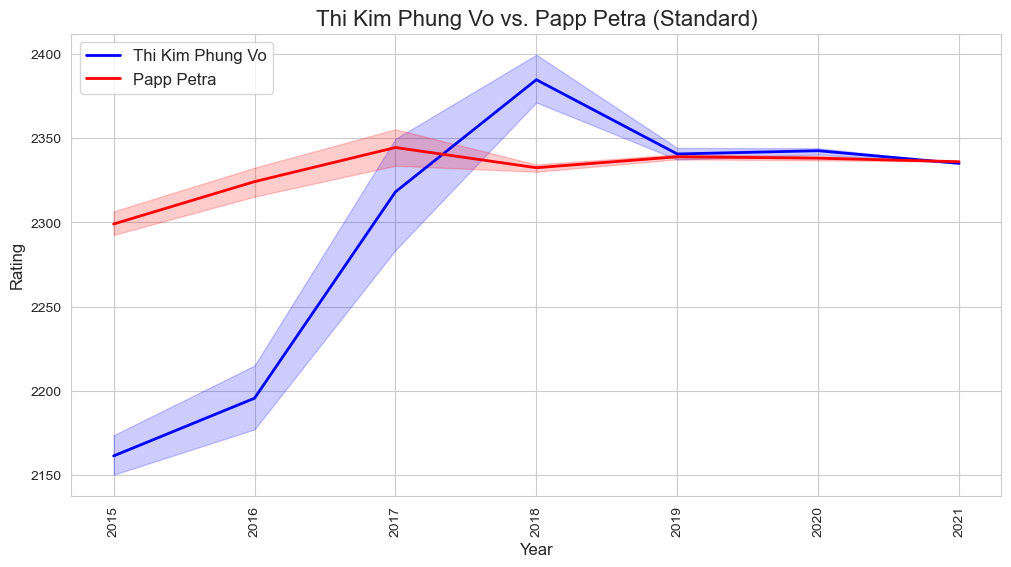

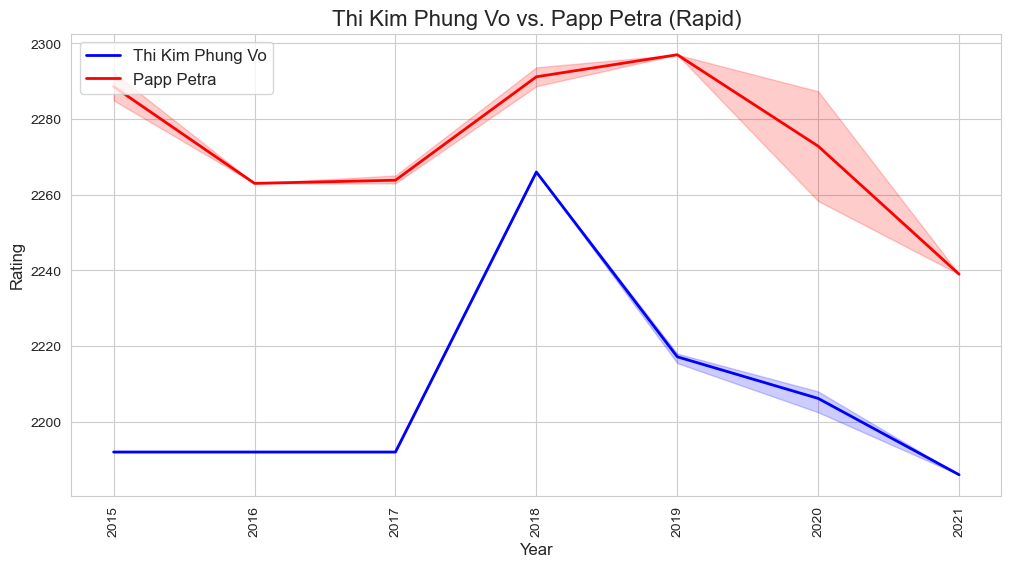

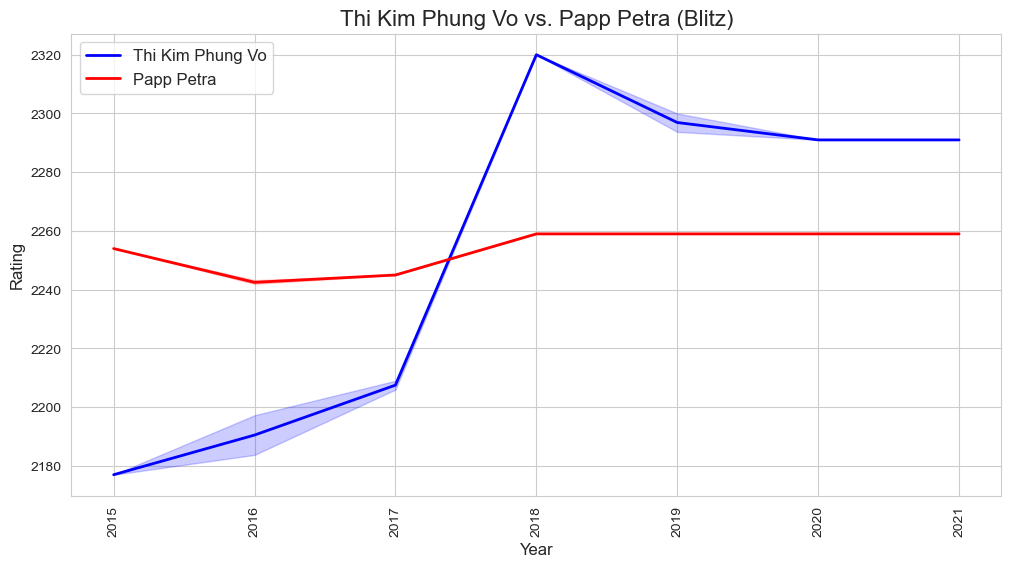

The players, kungmongmanh and meoluoi91 have played 20 games against each other.


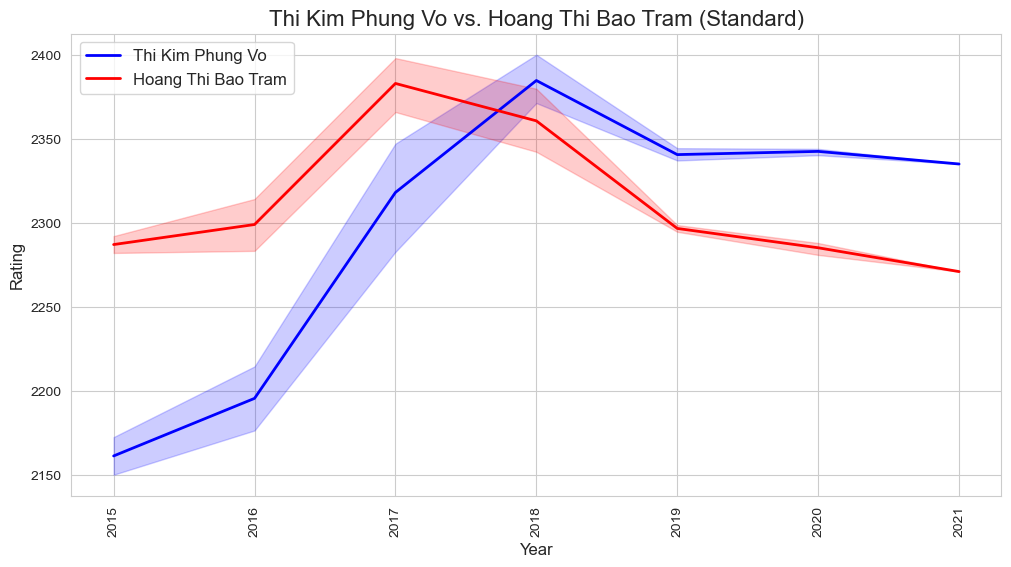

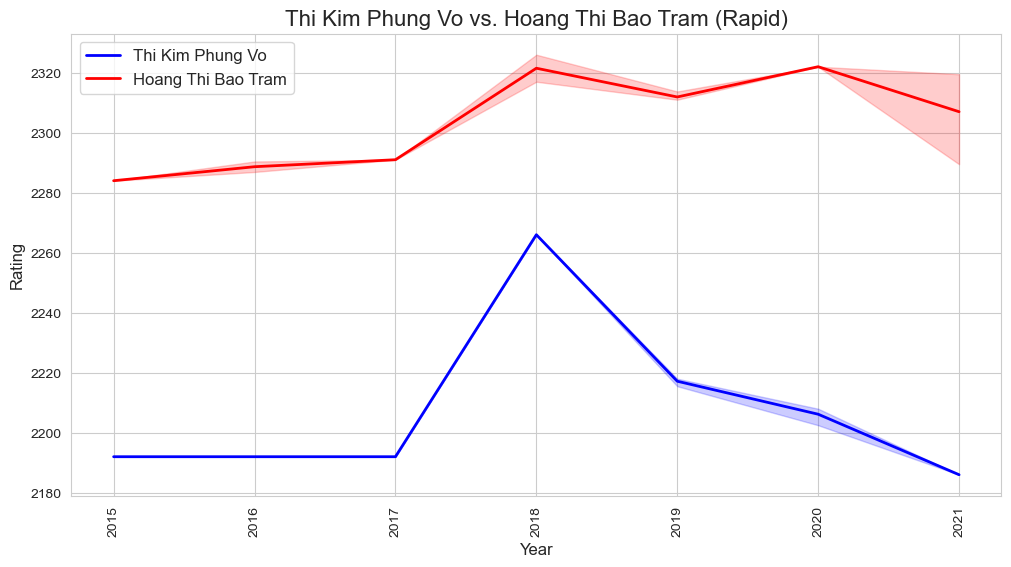

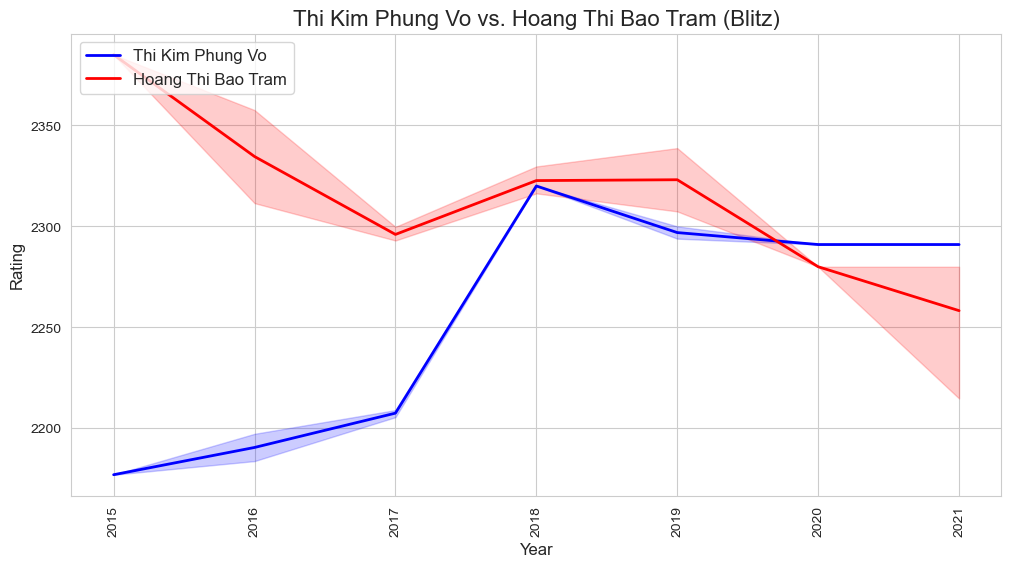

The players, martinique24 and cukus have played 16 games against each other.
Evidently, martinique24 or cukus is not in the mappings.


In [36]:
pairing_counts = wgm[['white_username','black_username']].value_counts()
pairings_dataframe = combine_pairs(pairing_counts)
more_than_10 = pairings_dataframe[pairings_dataframe['number_of_games']>10]
track_top_10(more_than_10)

It can be discerned from the above DataFrames, tables, and visualizations that sometimes higher-ranked players lose against lower-ranked players and that even masters have very different career trajectories. One would expect this, as even the top players in the world can have their off days. No one is infallible, and ultimately, it should be expected that there will be some variation.

## Discussion: Ethical Implications of Study

Although one could take issue with a number of components of this study, for purposes of brevity and scope, this study will limit itself to consideration of two important ethical considerations: Gender issues and nationalism. It is also true that if some aspect of this study is scientifically flawed (e.g., if it produces inaccurate conclusions), it may itself be part of the problems that it will discuss. 

*Gender Comparison*

With the data analysis in part one, it is evident that Gukesh, as an individual, is a stronger player overall than Garifullina in standard and blitz styles, based on the comparison of their average rating increases through the styles of play. This may tempt one into thinking that it is *due* to gender differences in chess playing talent. However, what this data fails to include is a complete picture of the two players, the level of commitment, the time and resources spent toward improving their game, and the role of the social context at large. Ultimately, the comparison is between two people within a social context that *ab initio* embeds and conceals existing realities of gender inequality, which informs the interpretation of the analysis. It is important to keep this in mind and be aware of ones own biases.

*Nationalism*

Similar to problems with gender comparison vis-a-vis chess rankings, ranking federations in chess ratings can be problematic from an ethical standpoint. One of the main issues is the fact that chess is a game played by individuals, not countries. While it is true that players often represent their country in international competitions, their individual performances are what ultimately determine their ratings. Therefore, it may not be fair to hold entire federations responsible for the rating of their top players, or to compare them to other federations based on those ratings. Relatedly, ranking federations based on chess ratings can perpetuate stereotypes and biases. For example, some countries may be unfairly penalized for having a smaller pool of players, or for not having the same level of resources or support as other countries. Players from certain countries may be stereotyped as being weaker or stronger based on their country's rating, rather than being judged on their individual skills and performance. The hope would be, in examining this study and its findings, that one would *not* conclude any inherent superiority of Russians over others in playing chess. Russia being seen as the country with the best players in the world, while flattering to Russians, can ultimately be destructive. 

It is important to be mindful of these potential consequences when conducting these sorts of studies. 

## Conclusion

This study analysed the FIDE dataset in parts. Firstly, the assignment looked at the youngest players to hold the titles of GM and WGM, and their career progress in terms of ratings, visualizing their ratings over time and comparing them using methods of regression. Secondly, the assignment displayed the ranks of federations by the number of masters and summarized the 2021 player ratings for the top-ranked federations. The assignment then looked at which WGM played the most games with other WGMs and investigates surprising results in game outcomes. Finally, the assignment aimed to provide insights into player and federation performance in chess, as well as the challenges of working with multiple datasets. The study concluded with a discussion of how this sort of analysis may perpetuate harmful stereotypes and biases, overlook structural barriers and reinforce the idea that gender and nationality are the most important factors in a player's success. Ultimately, this project urges awareness informing responsible data analysis. 

## Works Cited

Grus, Joel. (2019). Data Science from Scratch, 2nd Edition: First Principles with Python. O'Reilly Media.

VanderPlas, J. (2016). Python Data Science Handbook: Essential Tools for Working with Data. O'Reilly Media, Inc.